In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta



In [4]:
data = pd.read_csv(r"C:\Users\IVAN\Documents\VSCODE\Python\Quantitative Research JP\L1\Nat_Gas.csv")

C:\Users\IVAN\AppData\Local\Temp\ipykernel_18804\2486644387.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


Text(0.5, 1.0, 'Natural Gas Price Over Time')

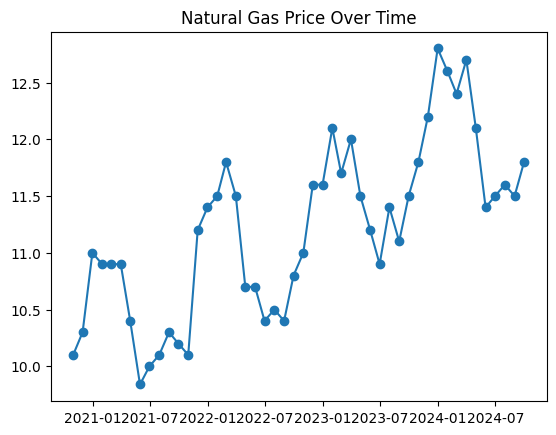

In [5]:
#Ordenar la data a datetime
data['Dates'] = pd.to_datetime(data['Dates'])
#Visualizar la data
plt.plot(data['Dates'], data['Prices'],'o-')
plt.title('Natural Gas Price Over Time')


In [6]:
# Function to estimate the purchase price of gas at any date
def estimate_price(input_date):
    # Extract features
    data['month'] = data['Dates'].dt.month
    data['day'] = data['Dates'].dt.day
    data['dayofweek'] = data['Dates'].dt.weekday  # Use weekday() to get the day of the week
    
    # Prepare features and target
    X = data[['month', 'day', 'dayofweek']].values
    y = data['Prices'].values
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Input features for the given date
    input_month = input_date.month
    input_day = input_date.day
    input_dayofweek = input_date.weekday()  # Use weekday() for the input date
    
    # Predict the price for the input date
    input_features = [[input_month, input_day, input_dayofweek]]
    
    estimated_price = model.predict(input_features)[0]
    
    return estimated_price




In [7]:
# Example: Estimate the price for a specific date
input_date = datetime(2024, 9, 25)  # Change this to your desired date
estimated_price = estimate_price(input_date)
print(f"Estimated price for {input_date.strftime('%Y-%m-%d')}: ${estimated_price:.2f}")

# Extrapolate prices for one year into the future
end_date = data['Dates'].max() + timedelta(days=365)
future_dates = pd.date_range(start=data['Dates'].max(), end=end_date, freq='D')
future_prices = [estimate_price(date) for date in future_dates]

Estimated price for 2024-09-25: $11.32


In [9]:
def price_contract(injection_dates, withdrawal_dates, purchase_prices, sale_prices,
                   injection_rate, withdrawal_rate, max_volume, storage_cost):
    """
    Calculate the value of the contract based on the provided parameters.

    Parameters:
    - injection_dates: List of dates when gas is injected.
    - withdrawal_dates: List of dates when gas is withdrawn.
    - purchase_prices: Prices at which the commodity can be purchased on injection dates.
    - sale_prices: Prices at which the commodity can be sold on withdrawal dates.
    - injection_rate: Rate at which gas is injected.
    - withdrawal_rate: Rate at which gas is withdrawn.
    - max_volume: Maximum volume that can be stored.
    - storage_cost: Storage cost.

    Returns:
    - contract_value: Total value of the contract.
    """
    # Initialize contract value
    contract_value = 0.0

    # Calculate cash flows for injection
    for i in range(len(injection_dates)):
        cash_flow = -purchase_prices[i] * injection_rate * max_volume
        contract_value += cash_flow

    # Calculate cash flows for withdrawal
    for i in range(len(withdrawal_dates)):
        cash_flow = sale_prices[i] * withdrawal_rate * max_volume
        contract_value += cash_flow

    # Deduct storage cost for each day in storage
    total_days_in_storage = (max(injection_dates) - min(injection_dates)).days + 1
    storage_cost_total = storage_cost * total_days_in_storage
    contract_value -= storage_cost_total

    return contract_value

# Example: Test the pricing function with sample inputs
injection_dates = [datetime(2024, 9, 25), datetime(2024, 10, 15)]
withdrawal_dates = [datetime(2024, 12, 1), datetime(2025, 2, 1)]
purchase_prices = [2.5, 3.0]
sale_prices = [3.5, 4.0]
injection_rate = 0.2
withdrawal_rate = 0.15
max_volume = 10000  # Example maximum volume in cubic meters
storage_cost = 0.1  # Example storage cost per unit volume

result = price_contract(injection_dates, withdrawal_dates, purchase_prices, sale_prices,
                        injection_rate, withdrawal_rate, max_volume, storage_cost)

print(f"Contract Value: ${result:.2f}")


Contract Value: $247.90
